In [1]:
import pandas as pd
import re
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

(1409, 13)


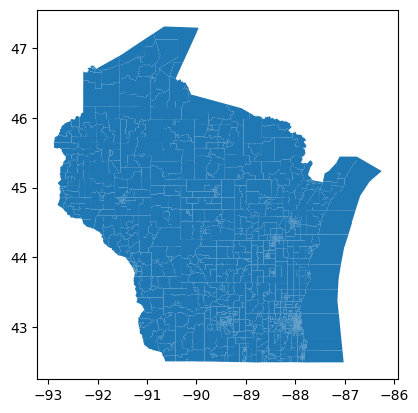

In [2]:
# use joined data
# df_joined = pd.read_csv ('Joined_data.csv')
df_joined = pd.read_csv ('../joined_data/joined_data_CHR.csv')

df_joined


geo = gpd.read_file("zip://../ct_data/tl_2019_55_tract.zip")
geo.plot()
print(geo.shape)
geo.head(1)

geo['GEOID']=geo['GEOID'].astype(np.int64)
df_joined = gpd.GeoDataFrame(pd.merge(df_joined,geo,how="left",left_on="ct",right_on = "GEOID"))


In [3]:
import pandas as pd
import re
import geopandas as gpd
import numpy as np
import libpysal.weights as weights
import libpysal

In [4]:
kd = libpysal.cg.KDTree(np.array(df_joined[["INTPTLAT","INTPTLON"]].values))
wnn = libpysal.weights.KNN(kd, 3)
nearest_pt = pd.DataFrame().from_dict(wnn.neighbors, orient="index")
for i in range(nearest_pt.shape[1]):
    nearest_pt = nearest_pt.rename({i:f"n_pt_{i}"}, axis=1)
nearest_pt.head(1)
print(nearest_pt)



      n_pt_0  n_pt_1  n_pt_2
0       1388       2    1387
1          4       2       3
2          0       1       3
3          5       2       1
4          1     403       5
...      ...     ...     ...
1385    1386    1384    1387
1386    1385    1387    1382
1387    1386    1382    1385
1388    1386    1385    1387
1389    1384    1385    1381

[1390 rows x 3 columns]


In [5]:
df_joined.reset_index(inplace=True)
df_joined

index           ct  male  female  Total_x  .50  .50-.99  1.00-1.24  \
0         0  55001950100  1504    1431     2935   46      139        117   
1         1  55001950201   676     667     1343   38      172         52   
2         2  55001950202  1414    1167     2578  118      268        164   
3         3  55001950400  2260    2269     4337  305      512        464   
4         4  55001950501   841     670     1511   25      238         34   
...     ...          ...   ...     ...      ...  ...      ...        ...   
1385   1385  55141011300  2090    2142     4133  103      225        141   
1386   1386  55141011400  2205    2958     5145  181      285        555   
1387   1387  55141011500  2897    2936     5820   99       79        121   
1388   1388  55141011600  2570    2472     5014  257      316        167   
1389   1389  55141011700  2157    2345     4377  350      439        192   

      1.25-1.49  1.50-1.84  ...        GEOID     NAME              NAMELSAD  \
0            42        151  ...  55001950100     9501     Census Tract 9501   
1            47         76  ...  55001950201  9502.01  Census Tract 9502.01   
2           148        191  ...  55001950202  9502.02  Census Tract 9502.02   
3           228        335  ...  55001950400     9504     Census Tract 9504   
4           170        118  ...  55001950501  9505.01  Census Tract 9505.01   
...         ...        ...  ...          ...      ...                   ...   
1385        306        332  ...  55141011300      113      Census Tract 113   
1386        399        193  ...  55141011400      114      Census Tract 114   
1387        158        150  ...  55141011500      115      Census Tract 115   
1388        255        141  ...  55141011600      116      Census Tract 116   
1389        225        328  ...  55141011700      117      Census Tract 117   

      MTFCC  FUNCSTAT      ALAND    AWATER     INTPTLAT      INTPTLON  \
0     G5020         S  233951801  17547549  +44.2022742  -089.7468898   
1     G5020         S  110142594   7642055  +44.0031471  -089.8876764   
2     G5020         S  467891428  50528185  +44.0888085  -089.7705744   
3     G5020         S  235590227   1195071  +43.9407474  -089.7376994   
4     G5020         S  114019282  19754029  +43.8817191  -089.8962390   
...     ...       ...        ...       ...          ...           ...   
1385  G5020         S   12013212   1425599  +44.3643651  -089.8372719   
1386  G5020         S   11657150    341824  +44.3673095  -089.8033856   
1387  G5020         S   33527893    605288  +44.3654643  -089.7591255   
1388  G5020         S  128689803   4188672  +44.2849618  -089.7980036   
1389  G5020         S   24304221   1663394  +44.3311010  -089.9117538   

                                               geometry  
0     POLYGON ((-89.92702 44.19367, -89.92679 44.194...  
1     POLYGON ((-90.01877 44.04772, -90.01870 44.048...  
2     POLYGON ((-90.02638 44.08721, -90.02627 44.089...  
3     POLYGON ((-89.93773 43.96629, -89.93738 43.966...  
4     POLYGON ((-89.98419 43.91181, -89.98397 43.913...  
...                                                 ...  
1385  POLYGON ((-89.85937 44.36194, -89.85928 44.362...  
1386  POLYGON ((-89.81719 44.38606, -89.81718 44.386...  
1387  POLYGON ((-89.80564 44.34373, -89.80245 44.347...  
1388  POLYGON ((-89.91256 44.27344, -89.91253 44.273...  
1389  POLYGON ((-89.92954 44.30861, -89.92958 44.308...  

[1390 rows x 106 columns]

In [6]:

df_joined = df_joined.join(nearest_pt)
df_joined.head(1)



index           ct  male  female  Total_x  .50  .50-.99  1.00-1.24  \
0      0  55001950100  1504    1431     2935   46      139        117   

   1.25-1.49  1.50-1.84  ...  MTFCC  FUNCSTAT      ALAND    AWATER  \
0         42        151  ...  G5020         S  233951801  17547549   

      INTPTLAT      INTPTLON  \
0  +44.2022742  -089.7468898   

                                            geometry  n_pt_0  n_pt_1  n_pt_2  
0  POLYGON ((-89.92702 44.19367, -89.92679 44.194...    1388       2    1387  

[1 rows x 109 columns]

In [21]:
use_pca = True
algo_input_addtri = []
# algo_input_addtri = ["n_pt_0", "n_pt_1", "n_pt_2"]
# algo_input_addtri.append("male")
# algo_input_addtri.append("female")
geo_attrib = ['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry', 'ct', 'index']
for each in col_names_joined:
    if((each not in algo_input_addtri) and(each not in geo_attrib) ):
        if use_pca and "n_pt" in each:
            #skip for now 
            continue
        algo_input_addtri.append(each)
        print(each)
    

# print(algo_input_addtri)
df_pca = df_joined[algo_input_addtri]

male
female
Total_x
.50
.50-.99
1.00-1.24
1.25-1.49
1.50-1.84
1.85-1.99
2.00
Total_y
NoSchoolingCompleted
NurserySchool
Kindergarten
1St_Grade
2Nd_Grade
3Rd_Grade
4Th_Grade
5Th_Grade
6Th_Grade
7Th_Grade
8Th_Grade
9Th_Grade
10Th_Grade
11Th_Grade
12Th_Grade_NoDiploma
HighSchoolDiploma
AlternativeCredential
College1Year
College1MoreYears
Associate
Bachelor
Master
ProfessionalSchool
Doctorate
age_5
age_5_9
age_10_14
age_15_17
age_18_19
age_20
age_21
age_22_24
age_25_29
age_30_34
age_35_39
age_40_44
age_45_49
age_50_54
age_55_59
age_60_61
age_62_64
age_65_66
age_67_69
age_70_74
age_75_79
age_80_84
age_85
no_health_insurance_under18
no_health_insurance_18_34
no_health_insurance_35_64
no_health_insurance_65
white
black
native
asian
hawaiian
other
two
family_income
Total
10000
10000-14999
15000-19999
20000-24999
25000-29999
30000-34999
35000-39999
40000-44999
45000_49999
50000-59999
60000-74999
75000-99999
100000-124999
125000-149999
150000-199999
200000
household_median_income
pop
no_hispanic

In [33]:
col_names_joined = pd.Series(df_joined.columns)
col_names_joined
print('All joined attributes \n',df_joined.columns.to_list(),'\n')

#1. pca, may lose interpretability
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
if use_pca:
    pca = PCA(n_components=5)
    df_normalized_pca=(df_pca - df_pca.mean()) / df_pca.std()
    pca.fit(df_normalized_pca)
    # print(pca.components_ )

    pca_df = pd.DataFrame(pca.transform(df_pca), columns=['PCA%i' % i for i in range(5)], index=df_pca.index)
    pca_df = pca_df.join(nearest_pt)
    pca_df.head(1)
    cols_pca = pd.Series(pca_df.columns)
    algo_input_addtri = []
    for each in cols_pca:
        
        algo_input_addtri.append(each)
    print(algo_input_addtri)
    
    



All joined attributes 
 ['index', 'ct', 'male', 'female', 'Total_x', '.50', '.50-.99', '1.00-1.24', '1.25-1.49', '1.50-1.84', '1.85-1.99', '2.00', 'Total_y', 'NoSchoolingCompleted', 'NurserySchool', 'Kindergarten', '1St_Grade', '2Nd_Grade', '3Rd_Grade', '4Th_Grade', '5Th_Grade', '6Th_Grade', '7Th_Grade', '8Th_Grade', '9Th_Grade', '10Th_Grade', '11Th_Grade', '12Th_Grade_NoDiploma', 'HighSchoolDiploma', 'AlternativeCredential', 'College1Year', 'College1MoreYears', 'Associate', 'Bachelor', 'Master', 'ProfessionalSchool', 'Doctorate', 'age_5', 'age_5_9', 'age_10_14', 'age_15_17', 'age_18_19', 'age_20', 'age_21', 'age_22_24', 'age_25_29', 'age_30_34', 'age_35_39', 'age_40_44', 'age_45_49', 'age_50_54', 'age_55_59', 'age_60_61', 'age_62_64', 'age_65_66', 'age_67_69', 'age_70_74', 'age_75_79', 'age_80_84', 'age_85', 'no_health_insurance_under18', 'no_health_insurance_18_34', 'no_health_insurance_35_64', 'no_health_insurance_65', 'white', 'black', 'native', 'asian', 'hawaiian', 'other', 'two',

In [34]:
if use_pca:
    df_final = pca_df
else:
    df_final = df_joined[algo_input_addtri]

In [35]:
import copy
df_final.to_csv(r'synthetic_data_joined.txt', header=None, index=True, sep=',')
print(df_joined.shape)
final_input_attri = copy.copy(algo_input_addtri)
final_input_attri.insert(0,"id")
print(final_input_attri)

(1390, 109)
['id', 'PCA0', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'n_pt_0', 'n_pt_1', 'n_pt_2']


In [36]:

synthetic_data_input = pd.read_table(r'synthetic_data_joined.txt', sep=',', names=final_input_attri)
synthetic_data_input = synthetic_data_input.set_index("id")
# synthetic_data_input
synthetic_data_input.head(1)
np.where(pd.isnull(synthetic_data_input))
# synthetic_data_input.loc[74].tolist()
# w_voronoi = weights.Voronoi.from_dataframe(prev)

(array([], dtype=int64), array([], dtype=int64))

In [37]:
# prev[["DP03_0001E", "DP03_0001PE", 
#                 "DP03_0002E", 
#                 "DP03_0002PE", "DP03_0003E"]] = synthetic_data_input[["DP03_0001E", "DP03_0001PE", 
#                 "DP03_0002E", 
#                 "DP03_0002PE", "DP03_0003E"]]
# prev.head(1)

#find last 
colums_name = synthetic_data_input.columns
for i in range(len(synthetic_data_input.columns)):
    print(colums_name[i])
#     if("hispanic" == colums_name[i]):
#         print("last index", i+1)
#     if("n_pt_2" == colums_name[i]):
#         print("last neighbor index", i+1)
synthetic_data_input.shape

PCA0
PCA1
PCA2
PCA3
PCA4
n_pt_0
n_pt_1
n_pt_2


(1390, 8)

In [11]:
# w_voronoi = weights.Voronoi.from_dataframe(prev)

In [38]:
# !rm -rf result_synthetic_data_joined.txt
!python STICC_main.py --fname=synthetic_data_joined.txt --oname=result_synthetic_data_joined.txt --attr_idx_start=1 \
--attr_idx_end=5 --spatial_idx_start=6 --spatial_idx_end=8 \
--spatial_radius=3 --number_of_clusters 3 --lambda_parameter 10e-2 --beta 5 --maxIters 20 

^C
